In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import export_text, DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("stress_detection.csv", index_col=0)
df

,day,PSS_score,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
participant_id,,,,,,,,,,,,,,,,,,,
1,1,34,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,2,37,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
1,3,30,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
1,4,16,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
1,5,32,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,26,30,2.529821,2.339608,1.321208,4.204331,4.890738,8.823033,8.703758,8.661936,2,59.106125,0,1,11.339248,4.045863,1.694037,0.859401,4.123621
100,27,33,1.319100,4.500507,4.816983,2.416180,4.195933,5.260243,5.890244,6.456058,4,56.137068,12,17,10.694380,2.169768,1.657737,0.108480,2.242326
100,28,30,1.899102,3.930147,4.047799,3.163160,2.559401,6.425568,7.978066,7.188921,3,58.102473,13,21,8.646478,4.995654,1.046666,0.508623,2.088313


In [6]:
# Primitive cross-validation. Separating randomly has the same effect.
train_data = df.head(2500)
val_data = df.tail(500)

In [ ]:
### Actual cross validation that we plan to use ###

# # Get unique participant IDs
# unique_ids = df.index.unique()

# # Shuffle the IDs
# np.random.seed(0) # Not truly random!
# shuffled_ids = np.random.permutation(unique_ids)

# # Split the IDs
# n_train = int(len(shuffled_ids) * 0.8)
# n_val = int(len(shuffled_ids) * 0.1)
# n_test = len(shuffled_ids) - n_train - n_val

# train_ids = shuffled_ids[:n_train]
# val_ids = shuffled_ids[n_train:n_train + n_val]
# test_ids = shuffled_ids[n_train + n_val:]

# # Filter rows by IDs
# train_data = df[df.index.isin(train_ids)]
# val_data = df[df.index.isin(val_ids)]
# test_data = df[df.index.isin(test_ids)]

# # Print sizes
# print(f"Train size: {len(train_data)}")
# print(f"Validation size: {len(val_data)}")
# print(f"Test size: {len(test_data)}")

In [ ]:
X_train, y_train = train_data.drop(columns="PSS_score"), train_data.PSS_score
X_val, y_val = val_data.drop(columns='PSS_score'), val_data['PSS_score']

In [19]:
X_train

,day,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism,sleep_time,wake_time,sleep_duration,PSQI_score,call_duration,num_calls,num_sms,screen_on_time,skin_conductance,accelerometer,mobility_radius,mobility_distance
participant_id,,,,,,,,,,,,,,,,,,
1,1,2.322732,4.332193,1.185878,1.570213,3.782094,7.726792,5.190660,6.572069,1,3.924527,12,32,10.703714,3.115730,0.161717,1.145179,2.196851
1,2,1.761436,3.254120,3.907281,4.072512,1.997145,7.312674,6.170717,8.030168,4,58.318004,3,41,11.012939,0.959144,0.985587,1.021133,0.737825
1,3,3.025887,1.855002,2.045900,2.317493,3.619225,6.992060,5.318825,7.102420,1,4.941043,4,48,4.877372,3.311629,1.877445,0.478179,0.911673
1,4,1.948370,4.966676,3.345225,1.607756,3.583524,8.886914,8.061075,8.123294,3,0.295373,11,38,3.462956,0.625721,0.494921,0.630549,3.911418
1,5,3.343484,2.065936,3.137843,2.118061,2.567347,7.811705,7.312145,7.785143,3,22.300571,17,17,4.861046,0.622609,1.342600,0.254090,1.605132
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,6,3.703781,1.296630,2.116691,2.039509,2.955296,5.676691,5.250972,8.780086,1,1.061940,9,1,4.597160,1.445043,1.937237,0.579644,2.272117
84,7,3.703037,4.259859,4.789652,2.067105,2.564628,5.240225,8.039434,7.551028,1,7.994803,9,19,1.489260,3.206102,2.292650,0.704083,2.648523
84,8,4.417820,2.882184,3.999049,1.526033,3.645911,7.686243,8.678028,6.185552,1,25.634404,14,23,7.541740,0.673305,1.537375,1.228914,4.174174


In [9]:
max_depth_range = range(1, 21)  # Example: 1 to 20
min_impurity_decrease_range = np.arange(0.0, 0.5, 0.05)

In [10]:
best_score = float('inf')  # Track the best score (lower MSE is better)
best_params = None         # Track the best parameters
results = []               # Store results for inspection

# We will loop through each of our parameters to do grid search by hand
for max_depth in max_depth_range:
    for min_impurity_decrease in min_impurity_decrease_range:
        # Create model
        model = DecisionTreeRegressor(
            criterion='squared_error',
            max_depth=max_depth,
            min_impurity_decrease=min_impurity_decrease
        )
        model.fit(X_train, y_train)
        
        # Predict on validation data
        y_val_pred = model.predict(X_val)
        val_mse = mean_squared_error(y_val, y_val_pred)
        ### Uncomment for best params on training data
        # y_val_pred = model.predict(X_train)
        # val_mse = mean_squared_error(y_train, y_val_pred)
        
        # Update results
        results.append({
            'max_depth': max_depth,
            'min_impurity_decrease': min_impurity_decrease,
            'val_mse': val_mse
        })
        if val_mse < best_score:
            best_score = val_mse
            best_params = {'max_depth': max_depth, 'min_impurity_decrease': min_impurity_decrease}

# Output the best parameters and corresponding validation MSE
results_df = pd.DataFrame(results)
print(f"Best parameters: {best_params}")
print(f"Best validation MSE: {best_score}")


Best parameters: {'max_depth': 1, 'min_impurity_decrease': 0.35000000000000003}
Best validation MSE: 71.496208


In [1]:
model = DecisionTreeRegressor(criterion='squared_error', max_depth=1, min_impurity_decrease=0.51)
# model = DecisionTreeRegressor(criterion='squared_error', max_depth=2)
model.fit(X_train, y_train)
fig = plt.figure()
_ = tree.plot_tree(model,feature_names=X_train.columns)
plt.title("Decision Tree")
# print(export_text(model, feature_names=X.columns))

# Notes from prof:
# Check MSE train and MSE test against each other
# try min_impurity_decrease in regressor
# only show first 3 layers on slides and interpret them, bigger font (make readable)
# maybe decrease max_depth as last step

NameError: name 'DecisionTreeRegressor' is not defined

In [14]:
y_model_train_hat = model.predict(X_train)
mean_squared_error(y_train, y_model_train_hat)

74.749136

In [15]:
y_train_hat = [np.mean(y_train)] * len(y_train)
mean_squared_error(y_pred=y_train_hat, y_true=y_train)

74.749136

In [14]:
y_val_hat = [np.mean(y_train)] * len(y_val)
mean_squared_error(y_pred=y_val_hat, y_true=y_val)

74.31869600694445

In [20]:
model = DecisionTreeRegressor(criterion='squared_error', max_depth=4, min_impurity_decrease=0.45)
model.fit(X_train, y_train)


y_model_val_hat = model.predict(X_val)
mean_squared_error(y_true=y_val, y_pred=y_model_val_hat)

74.31869600694445

In [26]:
val_data.PSS_score.values

array([14, 20, 13, 37, 38, 27, 22, 22, 39, 22, 18, 36, 38, 15, 26, 14, 23,
       25, 30, 12, 29, 26, 37, 20, 12, 17, 39, 26, 29, 35, 17, 31, 32, 30,
       21, 37, 38, 28, 23, 33, 18, 14, 14, 11, 19, 27, 19, 12, 23, 14, 35,
       13, 31, 39, 16, 31, 31, 16, 30, 37, 25, 37, 30, 36, 22, 26, 29, 23,
       17, 24, 36, 15, 31, 20, 21, 16, 33, 27, 17, 33, 36, 22, 22, 27, 37,
       39, 36, 21, 20, 24, 33, 33, 33, 29, 30, 12, 31, 34, 32, 19, 30, 19,
       30, 33, 36, 15, 12, 18, 30, 17, 21, 16, 31, 11, 28, 11, 26, 23, 28,
       24, 15, 29, 33, 30, 28, 16, 32, 18, 28, 35, 26, 15, 24, 21, 37, 18,
       30, 35, 11, 12, 28, 11, 36, 37, 18, 23, 22, 16, 17, 15, 29, 13, 20,
       36, 21, 35, 10, 29, 20, 35, 34, 38, 33, 15, 19, 19, 36, 28, 20, 13,
       14, 14, 14, 18, 13, 35, 27, 23, 19, 17, 14, 39, 22, 35, 31, 20, 14,
       29, 20, 13, 33, 12, 11, 13, 31, 21, 22, 29, 28, 11, 32, 13, 36, 13,
       38, 33, 12, 24, 38, 17, 24, 30, 13, 30, 17, 12, 35, 21, 13, 12, 38,
       31, 17, 12, 15, 32

In [34]:
from sklearn import linear_model
model = linear_model.Lasso()
model.fit(X_train, y_train)


y_model_val_hat = model.predict(X_val)
mean_squared_error(y_true=y_val, y_pred=y_model_val_hat)

74.17232993152844

In [37]:
import seaborn as sns
import pandas as pd

# Assuming `df` is your DataFrame
sns.pairplot(df, diag_kind='kde')  # `diag_kind='kde'` adds kernel density estimation to diagonal plots


ModuleNotFoundError: No module named 'seaborn'

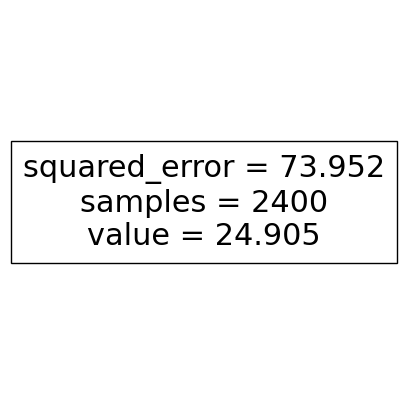

In [16]:
fig = plt.figure(figsize=(5, 5))
_ = tree.plot_tree(model, feature_names=X_train.columns)